<h1>Complete tasks using Pandas</h1>

2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23,24, 25, 26, 27


In [2]:
import string
import random
import pandas as pd
import numpy as np

df = pd.read_csv('./NationalNames.csv')

<h2>2. Вивести останні 8 рядків набору даних.</h2>

In [ ]:
df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


<h2>4.Отримайте загальну інформацію про дані у наборі даних</h2>

In [3]:
columns_included = ['Id', 'Year', 'Count']
summary = df[columns_included].describe(percentiles=[.25, .5, .75])
summary

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


<h2>6.Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних.<h2>

In [4]:
df.groupby(['Gender'])['Name'].nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

<h2>7.Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.<h2>

In [ ]:
df[(df['Gender'] == 'M') & (df['Year'] == 2010)].sort_values(by=['Count'], ascending=False)[:5]

<h2>9.Підрахуйте кількість записів, для яких Count-мінімальне у наборі.<h2>

In [ ]:
minimal = df.loc[df['Count'].idxmin()]
rows = df[df['Count'] == minimal['Count']]
rows.shape[0]

<h2>10. Підрахуйте кількість унікальних імен у кожному році</h2>

In [ ]:
df.groupby('Year')['Name'].nunique().head()

Year
1880    1889
1881    1830
1882    2012
1883    1962
1884    2158
Name: Name, dtype: int64

<h2>15. Знайдіть загальну кількість народжень за рік.</h2>

In [ ]:
df.groupby('Year')['Count'].sum().head()

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64

<h2>16. Знайдіть рік, коли народилося найбільше дітей</h2>

In [ ]:
df.groupby('Year')['Count'].sum().idxmax()

1957

<h2>17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного</h2>

In [ ]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack().head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


<h2>18. Підрахуйте кількість років, коли дівчаток народжувалось більше,
ніж хлопчиків.</h2>

In [ ]:
boys_girls_count = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
boys_girls_count[boys_girls_count['F'] > boys_girls_count['M']].shape[0]

54

<h2>20.Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)<h2>

In [ ]:
num_of_years = len(df['Year'].unique())
print(f"Спостереження проводились {num_of_years} років.")

<h2>21. Порахуйте, скільки разів хлопчиків називали Barbara</h2>

In [ ]:
df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

4139

<h2>22. Підрахуйте скільки років проводилось спостереження</h2>

In [ ]:
num_of_years = len(df['Year'].unique())
print(f"Спостереження проводились {num_of_years} років.")

Спостереження проводились 135 років.


<h2>23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні
кожного року)</h2>

In [ ]:
num_of_years = len(df['Year'].unique())
male_names = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
popular_gender_neutral_names = df[df['Name'].isin(gender_neutral_names)].groupby('Name').filter(lambda x: x['Year'].nunique() == num_of_years)['Name'].unique()
pd.DataFrame(data=popular_gender_neutral_names)

,0
0,Mary
1,Anna
2,Emma
3,Elizabeth
4,Minnie
...,...
818,Noble
819,Rupert
820,Thad
821,Kelly


<h2>24. Знайти найпопулярніше серед непопулярних імен (непопулярне
ім’я, яким називали дітей найбільшу кількість разів )</h2>

In [ ]:
years_threshold = 50
unpopular_names = df.groupby('Name').filter(lambda x: x['Year'].nunique() < years_threshold).groupby('Name')['Count'].sum()
unpopular_name = unpopular_names.sort_values(ascending=False).head(1)
f"Найпопулярніше ім'я серед непопулярних (названих менш ніж за {years_threshold} років) - {unpopular_name.index[0]}, {unpopular_name.values[0]} разів."

"Найпопулярніше ім'я серед непопулярних (названих менш ніж за 50 років) - Jayden, 189220 разів."

<h2>25.Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі<h2>

<Axes: xlabel='Year'>

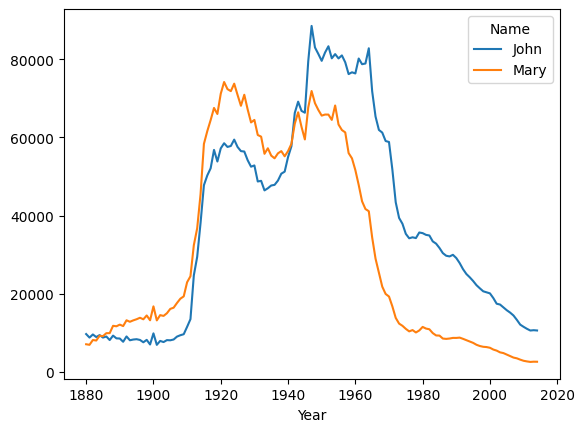

In [5]:
df[df['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack().plot()

<h2>26. Побудувати графіки розподілення кількості жіночих імен John та
чоловічих імен Mary по роках.</h2>

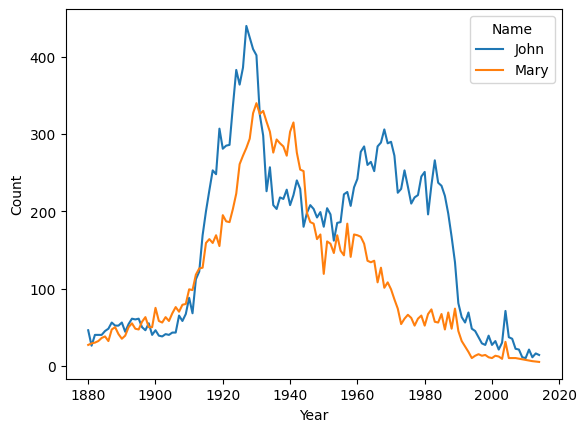

In [ ]:
import matplotlib.pyplot as plt

john_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
mary_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

plt.plot(john_data['Year'], john_data['Count'], label='John')
plt.plot(mary_data['Year'], mary_data['Count'], label='Mary')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')

plt.show()

<h2>27.Знайти найпопулярніші імена в кожному році<h2>

In [ ]:
byYear = df.groupby(['Year', 'Name'])['Count'].sum().reset_index()
most_popular = byYear.loc[byYear.groupby('Year')['Count'].idxmax()]
most_popular